<a href="https://colab.research.google.com/github/Shivstdn25/my-colab-notebooks/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install numpy pandas matplotlib scikit-learn yfinance

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf


In [36]:
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
print(data.head())


/tmp/ipython-input-36-951841567.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620827  72.681274  71.373203  71.627077  135480400
2020-01-03  71.914825  72.676454  71.689965  71.847125  146322800
2020-01-06  72.487869  72.526556  70.783271  71.034732  118387200
2020-01-07  72.146935  72.753816  71.926907  72.497522  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200


In [37]:
data.dropna(inplace=True)

In [38]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data.dropna(inplace=True)

In [39]:
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Linear Regression Model

Train the model using the training data:

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluate the Model

Make predictions and evaluate the model's performance:

In [41]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.9695251744605989
R-squared: 0.9987614589369435


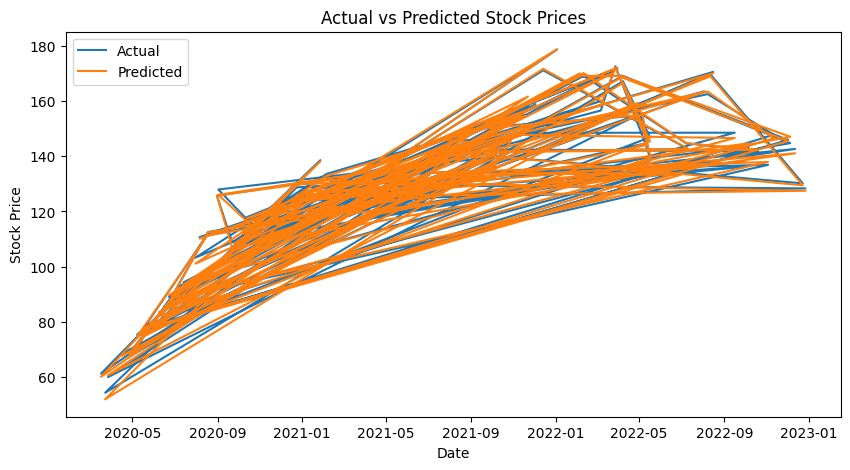

In [42]:
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()


Make Future Predictions

To make predictions on future data, prepare the future_data DataFrame:

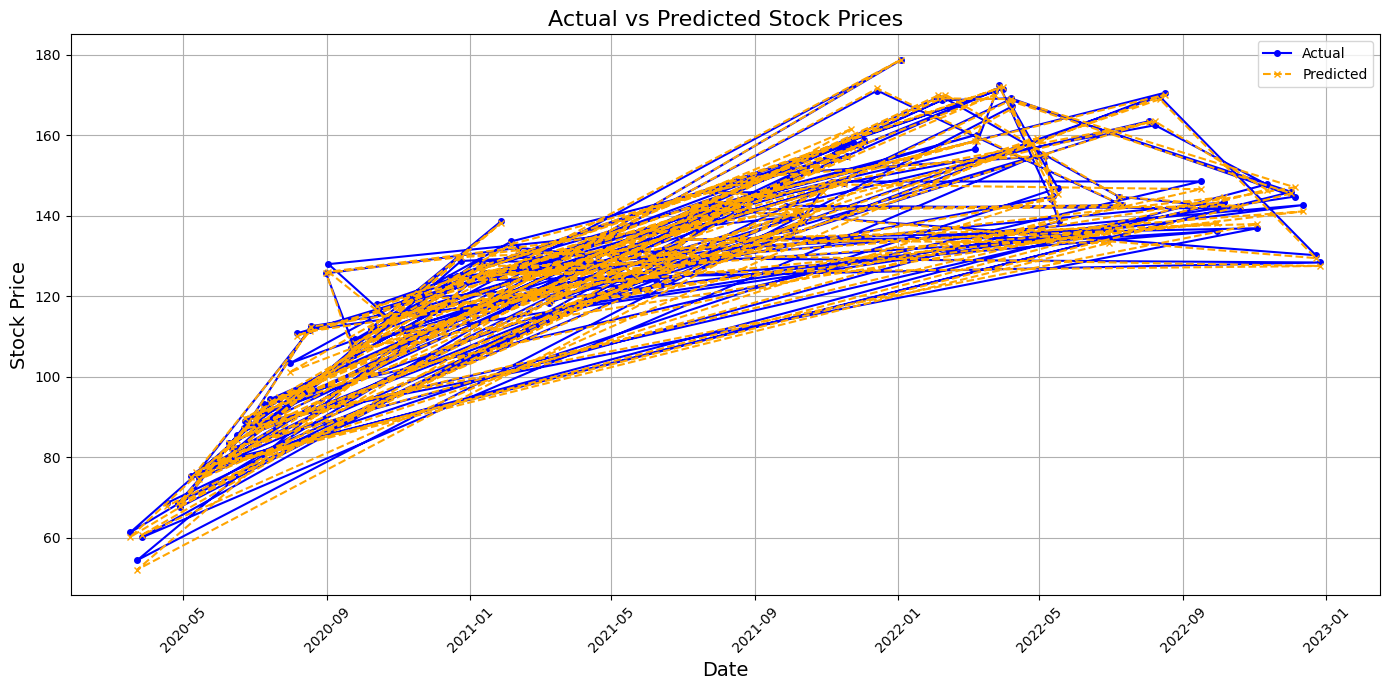

In [46]:
import matplotlib.pyplot as plt

# Assuming `dates`, `actual_prices`, and `predicted_prices` are your data variables
plt.figure(figsize=(14, 7))

# Plotting Actual Prices
plt.plot(y_test.index, y_test, label='Actual', color='blue', linestyle='-', marker='o', markersize=4)

# Plotting Predicted Prices
plt.plot(y_test.index, y_pred, label='Predicted', color='orange', linestyle='--', marker='x', markersize=4)

# Adding Title and Labels
plt.title("Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price", fontsize=14)

# Adding a Legend
plt.legend()

# Enabling Grid
plt.grid()

# Displaying the Plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()